In [1]:
#!pip install nltk
!pip install beautifulsoup4

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk import word_tokenize, pos_tag, ne_chunk
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np


In [2]:
# Download the 'maxent_ne_chunker' resource
import nltk

# Download the 'maxent_ne_chunker' resource
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
from src.common_basis import *

i = load_incel_parquet()

In [60]:
import datetime
df = i.incel_posts

# alternate fix is to load the data with another pandas backend. This is more memory-hungry however and the initial load is slower as well.
df = load_incel_parquet(dtype_backend='numpy_nullable').incel_posts
df[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]

df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5
...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36


In [61]:
temp = df
temp['post_content_clean'] = temp['post_html']
temp

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,"<div class=""message-content js-messageContent""..."
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,"<div class=""message-content js-messageContent""..."
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,"<div class=""message-content js-messageContent""..."
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,"<div class=""message-content js-messageContent""..."
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,"<div class=""message-content js-messageContent""..."
...,...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33,"<div class=""message-content js-messageContent""..."
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34,"<div class=""message-content js-messageContent""..."
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35,"<div class=""message-content js-messageContent""..."
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36,"<div class=""message-content js-messageContent""..."


In [62]:
#s = i.incel_posts

# Take a sample DataFrame
#temp = pd.read_parquet('/Users/yanasadchy/Documents/GitHub/disc-analysis/data/input/parquet/incel_sample_posts.parquet')
#temp = s#.head(1000)

# Make a new column to clean up
#temp['post_content_clean'] = temp['post_html']

# Redundant
#data = temp.post_content.sample(1000)

#df = pd.DataFrame(data)
#temp

In [63]:
temp = temp.sample(100000)

In [64]:
%%time
# remove HTML shit
from bs4 import BeautifulSoup

temp['post_content_clean'] = temp['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

temp['post_content_clean']

CPU times: user 1min 5s, sys: 8.39 s, total: 1min 13s
Wall time: 1min 19s


1317545                   \n \n \n Ive no idea what that is 
1456706                                     Good investment.
275333     I don’t see why plants are so bad. They’re ful...
1565241    Or maybe is good, I would like to gtfo from th...
787596                                       My fucking ears
                                 ...                        
270228                                      DB Bulma though 
1065500                                      Pee pee poo poo
452933                                                  Same
7345                                                        
405120     It's just boring and dead end tbh oh yeah your...
Name: post_content_clean, Length: 100000, dtype: object

In [65]:
%%time
# Remove stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

temp.post_content_clean = temp.post_content_clean.apply(remove_stop_words)

CPU times: user 11.1 s, sys: 113 ms, total: 11.2 s
Wall time: 11.4 s


In [66]:
%%time
# Remove special symbols from 'post_content' column
import re

temp['post_content_clean'] = temp['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

CPU times: user 182 ms, sys: 6.08 ms, total: 188 ms
Wall time: 189 ms


In [67]:
%%time
# Remove named entities from 'post_content' column
def remove_named_entities(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    entities = nltk.ne_chunk(tagged, binary=True)
    filtered_tokens = [t[0] for t in entities if not isinstance(t, nltk.tree.Tree)]
    return ' '.join(filtered_tokens)

temp['post_content_clean'] = temp['post_content_clean'].apply(remove_named_entities)

temp

CPU times: user 1min 42s, sys: 3.77 s, total: 1min 45s
Wall time: 1min 47s


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
1317545,1315342,post-9089028,30,2022-07-02 16:37:49,Mentally lost cel said: Can’t watch your ...,"<div class=""message-content js-messageContent""...",74617,15,idea
1456706,1463836,post-2116462,211,2019-02-13 20:52:23,Good investment.,"<div class=""message-content js-messageContent""...",83177,31,investment
275333,287738,post-1972777,178,2019-01-13 02:13:21,I don’t see why plants are so bad. They’re ful...,"<div class=""message-content js-messageContent""...",16215,33,see plants bad full vitamins minerals fiber he...
1565241,1572121,post-2433070,246,2019-04-25 08:45:06,"Or maybe is good, I would like to gtfo from th...","<div class=""message-content js-messageContent""...",88348,3,maybe good would like gtfo planet dimention
787596,781116,post-4536132,23,2020-05-11 19:19:46,Daydreamincel said: View attachment 25620...,"<div class=""message-content js-messageContent""...",43983,19,fucking ears
...,...,...,...,...,...,...,...,...,...
270228,262956,post-5406445,126,2020-09-05 12:25:27,"SupremeG said: DragonBall is thrash, beca...","<div class=""message-content js-messageContent""...",14831,19,though
1065500,1049586,post-3812594,24,2020-02-11 12:25:07,pp183 said: me too Click to expand... P...,"<div class=""message-content js-messageContent""...",59065,9,pee poo poo
452933,442948,post-5360745,402,2020-08-31 01:12:15,Ellsworth said: I like to be frugal and s...,"<div class=""message-content js-messageContent""...",24644,17,
7345,5898,post-10081579,994,2022-11-19 03:14:05,depressedblackcel said: incel monthly sal...,"<div class=""message-content js-messageContent""...",265,41,


In [68]:
# Function to remove one-letter long words
def remove_one_letter_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

# Apply the function to the 'post_content' column
temp['post_content_clean'] = temp['post_content_clean'].apply(remove_one_letter_words)

In [69]:
%%time
# Word usage statistics
def get_word_usage(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    return fdist

temp['word_usage'] = temp.post_content_clean.apply(get_word_usage)

CPU times: user 5.97 s, sys: 137 ms, total: 6.11 s
Wall time: 6.23 s


In [70]:
%%time
# Extract main topics
def extract_main_topics(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    noun_phrases = []
    for word, tag in pos_tags:
        if 'NN' in tag:
            noun_phrases.append(lemmatizer.lemmatize(word, pos='n'))
    return noun_phrases

temp['main_topics'] = temp.post_content_clean.apply(extract_main_topics)

# Output the DataFrame with results
print(temp)


         post_id    post_id_str  poster_id         time_posted   
1317545  1315342   post-9089028         30 2022-07-02 16:37:49  \
1456706  1463836   post-2116462        211 2019-02-13 20:52:23   
275333    287738   post-1972777        178 2019-01-13 02:13:21   
1565241  1572121   post-2433070        246 2019-04-25 08:45:06   
787596    781116   post-4536132         23 2020-05-11 19:19:46   
...          ...            ...        ...                 ...   
270228    262956   post-5406445        126 2020-09-05 12:25:27   
1065500  1049586   post-3812594         24 2020-02-11 12:25:07   
452933    442948   post-5360745        402 2020-08-31 01:12:15   
7345        5898  post-10081579        994 2022-11-19 03:14:05   
405120    395429   post-8070359        290 2022-02-08 11:55:03   

                                              post_content   
1317545  

Mentally lost cel said:



Can’t watch your ...  \
1456706                                   Good investment.   
275333   I don’t see 

In [72]:
# clean empty rows in main topics
# Remove rows with lists containing only one value
temp['main_topics'] = temp['main_topics'].apply(lambda x: x if len(x) > 1 else np.nan)
temp.dropna(subset=['main_topics'], inplace=True)
temp

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
275333,287738,post-1972777,178,2019-01-13 02:13:21,I don’t see why plants are so bad. They’re ful...,"<div class=""message-content js-messageContent""...",16215,33,see plants bad full vitamins minerals fiber he...,"{'see': 1, 'plants': 1, 'bad': 1, 'full': 1, '...","[see, plant, vitamin, mineral, help, digestion..."
1565241,1572121,post-2433070,246,2019-04-25 08:45:06,"Or maybe is good, I would like to gtfo from th...","<div class=""message-content js-messageContent""...",88348,3,maybe good would like gtfo planet dimention,"{'maybe': 1, 'good': 1, 'would': 1, 'like': 1,...","[planet, dimention]"
1131240,1124857,post-1135873,679,2018-07-17 21:25:37,Profligate said: There's a difference bet...,"<div class=""message-content js-messageContent""...",63189,13,sorts pleasure never worth feel like present m...,"{'sorts': 1, 'pleasure': 1, 'never': 1, 'worth...","[sort, pleasure, feel, moment]"
804619,818533,post-4170116,428,2020-04-01 22:18:08,"I never liked it, it missed sequential points ...","<div class=""message-content js-messageContent""...",46097,11,never liked missed sequential points series tbh,"{'never': 1, 'liked': 1, 'missed': 1, 'sequent...","[point, series, tbh]"
649970,640115,post-4570196,29,2020-05-16 07:03:35,"Rarely do greycels get abused for being grey, ...","<div class=""message-content js-messageContent""...",36367,1,Rarely greycels get abused grey usually re new...,"{'Rarely': 1, 'greycels': 1, 'get': 2, 'abused...","[greycels, grey, post, retardation, bullying, ..."
...,...,...,...,...,...,...,...,...,...,...,...
582873,572579,post-8752585,12,2022-05-12 08:26:54,Nopish said: Louis Pasteur Click to expa...,"<div class=""message-content js-messageContent""...",32423,37,fraud hackster scientist scientific method eve...,"{'fraud': 1, 'hackster': 1, 'scientist': 1, 's...","[fraud, hackster, scientist, method, experimen..."
1576232,1569495,post-10184321,30,2022-12-03 13:42:39,Animecel2D said: Ew ur oneitis is disgust...,"<div class=""message-content js-messageContent""...",88176,14,foid ethnic,"{'foid': 1, 'ethnic': 1}","[foid, ethnic]"
1784215,1780625,post-3686903,23,2020-01-21 15:03:49,Numb said: Click to expand... Fakecel ...,"<div class=""message-content js-messageContent""...",100902,10,nt get luminary tomorrow,"{'nt': 1, 'get': 1, 'luminary': 1, 'tomorrow': 1}","[get, tomorrow]"
1065500,1049586,post-3812594,24,2020-02-11 12:25:07,pp183 said: me too Click to expand... P...,"<div class=""message-content js-messageContent""...",59065,9,pee poo poo,"{'pee': 1, 'poo': 2}","[pee, poo, poo]"


<Figure size 1000x600 with 0 Axes>

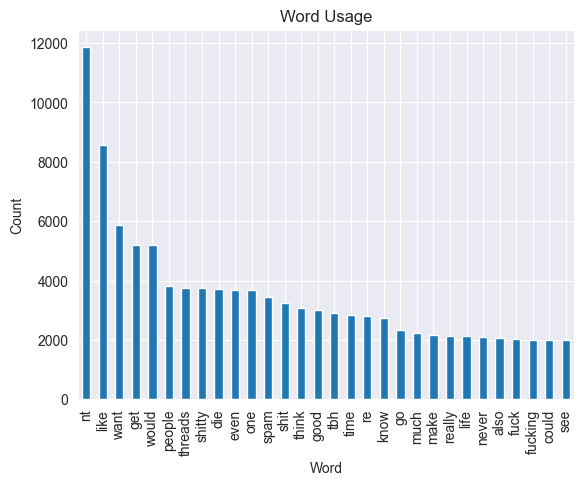

CPU times: user 18min 41s, sys: 9.83 s, total: 18min 51s
Wall time: 19min 20s


In [73]:
%%time
# Visualize the word use (takes few minutes time)
import matplotlib.pyplot as plt


word_usage = temp['word_usage'].sum()
word_df = pd.DataFrame.from_dict(word_usage, orient='index', columns=['Count'])
word_df = word_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

### build a network from words

In [74]:
len(word_df.index.to_list())
# select top 100 topics
top_topics_list = word_df.index.to_list()[:10]

# reserv copy of the temp
df = temp

# Function to check if a row contains any word from the top_topics_list
def contains_top_topic(row):
    for topic in top_topics_list:
        if topic in row:
            return True
    return False

# Remove rows that don't contain words from the top_topics_list
df = df[df['main_topics'].apply(contains_top_topic)]
df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
649970,640115,post-4570196,29,2020-05-16 07:03:35,"Rarely do greycels get abused for being grey, ...","<div class=""message-content js-messageContent""...",36367,1,Rarely greycels get abused grey usually re new...,"{'Rarely': 1, 'greycels': 1, 'get': 2, 'abused...","[greycels, grey, post, retardation, bullying, ..."
1723087,1710134,post-10816973,3870,2023-03-13 20:15:30,Despite the fact that this particular act done...,"<div class=""message-content js-messageContent""...",96684,1,Despite fact particular act done something ena...,"{'Despite': 1, 'fact': 1, 'particular': 1, 'ac...","[fact, act, something, incel, worship, accepta..."
322587,349028,post-3331429,653,2019-11-17 22:15:46,This guy betabuxxed fame and money. This doesn...,"<div class=""message-content js-messageContent""...",19927,6,guy betabuxxed fame money nt disprove blackpill,"{'guy': 1, 'betabuxxed': 1, 'fame': 1, 'money'...","[guy, money, nt, blackpill]"
1519077,1508397,post-7716766,1214,2021-12-07 18:38:54,"AngelLord said: Fuck, I have to watch tha...","<div class=""message-content js-messageContent""...",85579,1663,re welcome nt expect much writing wise based r...,"{'re': 1, 'welcome': 1, 'nt': 1, 'expect': 1, ...","[re, welcome, nt, wise, romance, foids, scene,..."
1755254,1747003,post-2528265,1842,2019-05-22 22:01:47,"Vanilla WoW was a true jewel, unlike most othe...","<div class=""message-content js-messageContent""...",98872,1,WoW true jewel unlike games unique part nt exp...,"{'WoW': 1, 'true': 1, 'jewel': 1, 'unlike': 1,...","[WoW, jewel, game, part, experience, time, cha..."
...,...,...,...,...,...,...,...,...,...,...,...
860326,864835,post-2187839,308,2019-02-27 19:57:43,Just be a chad that claims mentalcel because p...,"<div class=""message-content js-messageContent""...",48702,5,chad claims mentalcel people know chad forgot ...,"{'chad': 2, 'claims': 1, 'mentalcel': 1, 'peop...","[chad, claim, people, incel, br0]"
186345,200469,post-4618776,510,2020-05-22 14:37:47,Now that I have reached 500 posts and will sto...,"<div class=""message-content js-messageContent""...",10909,1,reached posts stop making loweffort posts deci...,"{'reached': 1, 'posts': 2, 'stop': 1, 'making'...","[post, post, compilation, opinion, make, nt, d..."
953619,944216,post-4032125,317,2020-03-14 10:19:04,PPEcel said: There's probably only a smal...,"<div class=""message-content js-messageContent""...",53259,11,know said rich nt expect ruin foid face less 1...,"{'know': 1, 'said': 1, 'rich': 1, 'nt': 1, 'ex...","[know, nt, ruin, face, Well, hole, money, Yeah..."
1784215,1780625,post-3686903,23,2020-01-21 15:03:49,Numb said: Click to expand... Fakecel ...,"<div class=""message-content js-messageContent""...",100902,10,nt get luminary tomorrow,"{'nt': 1, 'get': 1, 'luminary': 1, 'tomorrow': 1}","[get, tomorrow]"


In [ ]:
# select a subset (why?)
#df = df.head(900)
#df

In [75]:
%%time
# Drop empty rows
#df.dropna(subset=['main_topics'], inplace=True)

# Remove rows with lists containing only one value
df['main_topics'] = df['main_topics'].apply(lambda x: x if len(x) > 1 else np.nan)
df.dropna(subset=['main_topics'], inplace=True)


CPU times: user 9.69 ms, sys: 5.75 ms, total: 15.4 ms
Wall time: 16.4 ms


<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Visualize co-occurrence matrix

In [76]:
# Create co-occurrence matrix
import matplotlib.pyplot as plt
from matplotlib import cm

mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df['main_topics']), columns=mlb.classes_, index=df.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 1400

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

array([[ 0,  0,  2, ...,  0,  9, 11],
       [ 0,  0,  1, ...,  1,  7,  9],
       [ 2,  1,  0, ...,  1, 13,  9],
       ...,
       [ 0,  1,  1, ...,  0,  9,  6],
       [ 9,  7, 13, ...,  9,  0, 64],
       [11,  9,  9, ...,  6, 64,  0]])

In [98]:
# more filtering
original_co_occurrence_matrix = co_occurrence_matrix

threshold = 6000

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array.shape

(33, 33)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_68099/1970793102.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))


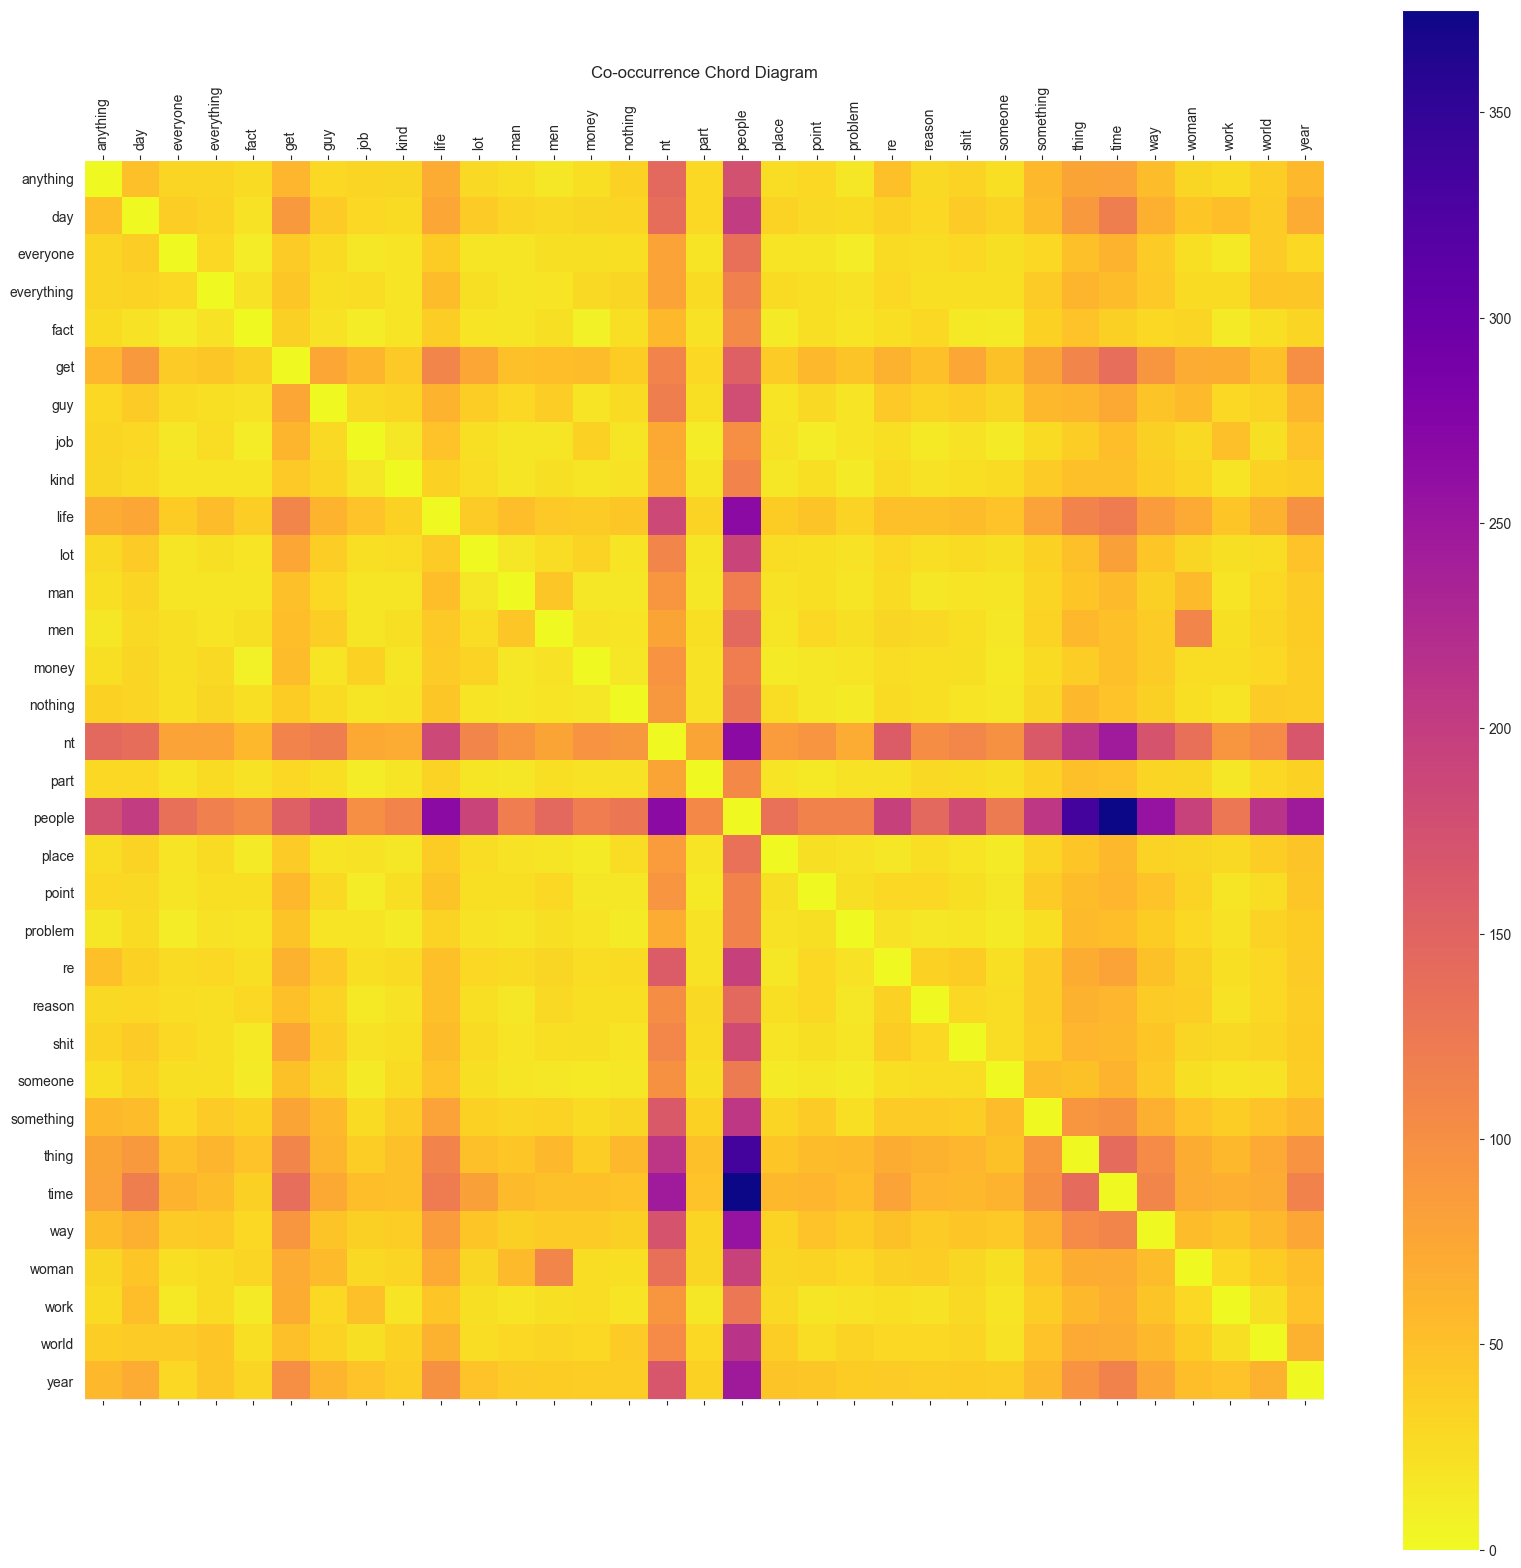

In [99]:
from matplotlib import cm

# Create the chord diagram
fig, ax = plt.subplots(figsize=(20, 20))
chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("test.svg")
# Display the chord diagram
plt.show()



# Comparative study


## produce 3 of these: 1 for ultra-right, 1 for ethnic groups; 1 for the rest.

In [101]:
temp

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
275333,287738,post-1972777,178,2019-01-13 02:13:21,I don’t see why plants are so bad. They’re ful...,"<div class=""message-content js-messageContent""...",16215,33,see plants bad full vitamins minerals fiber he...,"{'see': 1, 'plants': 1, 'bad': 1, 'full': 1, '...","[see, plant, vitamin, mineral, help, digestion..."
1565241,1572121,post-2433070,246,2019-04-25 08:45:06,"Or maybe is good, I would like to gtfo from th...","<div class=""message-content js-messageContent""...",88348,3,maybe good would like gtfo planet dimention,"{'maybe': 1, 'good': 1, 'would': 1, 'like': 1,...","[planet, dimention]"
1131240,1124857,post-1135873,679,2018-07-17 21:25:37,Profligate said: There's a difference bet...,"<div class=""message-content js-messageContent""...",63189,13,sorts pleasure never worth feel like present m...,"{'sorts': 1, 'pleasure': 1, 'never': 1, 'worth...","[sort, pleasure, feel, moment]"
804619,818533,post-4170116,428,2020-04-01 22:18:08,"I never liked it, it missed sequential points ...","<div class=""message-content js-messageContent""...",46097,11,never liked missed sequential points series tbh,"{'never': 1, 'liked': 1, 'missed': 1, 'sequent...","[point, series, tbh]"
649970,640115,post-4570196,29,2020-05-16 07:03:35,"Rarely do greycels get abused for being grey, ...","<div class=""message-content js-messageContent""...",36367,1,Rarely greycels get abused grey usually re new...,"{'Rarely': 1, 'greycels': 1, 'get': 2, 'abused...","[greycels, grey, post, retardation, bullying, ..."
...,...,...,...,...,...,...,...,...,...,...,...
582873,572579,post-8752585,12,2022-05-12 08:26:54,Nopish said: Louis Pasteur Click to expa...,"<div class=""message-content js-messageContent""...",32423,37,fraud hackster scientist scientific method eve...,"{'fraud': 1, 'hackster': 1, 'scientist': 1, 's...","[fraud, hackster, scientist, method, experimen..."
1576232,1569495,post-10184321,30,2022-12-03 13:42:39,Animecel2D said: Ew ur oneitis is disgust...,"<div class=""message-content js-messageContent""...",88176,14,foid ethnic,"{'foid': 1, 'ethnic': 1}","[foid, ethnic]"
1784215,1780625,post-3686903,23,2020-01-21 15:03:49,Numb said: Click to expand... Fakecel ...,"<div class=""message-content js-messageContent""...",100902,10,nt get luminary tomorrow,"{'nt': 1, 'get': 1, 'luminary': 1, 'tomorrow': 1}","[get, tomorrow]"
1065500,1049586,post-3812594,24,2020-02-11 12:25:07,pp183 said: me too Click to expand... P...,"<div class=""message-content js-messageContent""...",59065,9,pee poo poo,"{'pee': 1, 'poo': 2}","[pee, poo, poo]"


In [103]:
def remove_rows_without_words(dataframe, word_list, column_name):
    return dataframe[dataframe[column_name].apply(lambda x: any(word in x for word in word_list))]

In [104]:
#initialise lists
storm_list = ["stormfrontcel","nazicel","strormfrontcel","altrightcel","nationalistcel","stromfrontcel","antisemiticcel","rightcel","antisemeticcel","whitecel","jewcel","negroidcel","whitenationalistcel","kebabcel"]

# Call the function to remove rows without words from the list
df_storm = remove_rows_without_words(df, storm_list, 'post_content')
df_storm

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
1926497,1942015,post-894017,147,2018-06-02 21:14:26,id kill to be white so i can get an asian foid...,"<div class=""message-content js-messageContent""...",110357,5,id kill white get asian foid average slightly ...,"{'id': 1, 'kill': 1, 'white': 1, 'get': 1, 'as...","[id, get, average, arent]"
718385,718308,post-10473549,1675,2023-01-21 14:37:53,surreal said: Some whitecels here constan...,"<div class=""message-content js-messageContent""...",40798,25,white people invented technology made discover...,"{'white': 3, 'people': 6, 'invented': 1, 'tech...","[people, technology, discovery, science, peopl..."
2096905,2090684,post-6694597,57,2021-05-18 21:19:06,curryfool said: What about the Southern r...,"<div class=""message-content js-messageContent""...",117314,23,whitecels blackcels probably tbh Unironically ...,"{'whitecels': 2, 'blackcels': 2, 'probably': 1...","[whitecels, blackcels, whitecels, blackcels, a..."
1087949,1085603,post-4742883,23,2020-06-05 18:32:58,Quasimodocel said: View attachment 271992...,"<div class=""message-content js-messageContent""...",61018,6,reason unrelated looks ca nt get women heavily...,"{'reason': 1, 'unrelated': 1, 'looks': 1, 'ca'...","[reason, look, woman, Chad, fuck, Money, abstr..."
1946583,1932994,post-2624700,360,2019-06-20 14:29:10,"Arabcels, persiancels, blackcels, whitecels, r...","<div class=""message-content js-messageContent""...",109883,9,persiancels blackcels whitecels ricecels curry...,"{'persiancels': 1, 'blackcels': 1, 'whitecels'...","[persiancels, blackcels, whitecels, ricecels, ..."
1429457,1426967,post-9505732,289,2022-09-04 07:56:15,View: https://www.youtube.com/watch?v=ozTTwO8...,"<div class=""message-content js-messageContent""...",80993,1,themed restaurant waiters rude mean purpose fu...,"{'themed': 1, 'restaurant': 3, 'waiters': 2, '...","[restaurant, waiter, fun, experience, course, ..."
1423928,1417978,post-6864742,2935,2021-06-21 07:06:55,starcrapoo said: Listen. I'm not even whi...,"<div class=""message-content js-messageContent""...",80463,33,sure would side blacks whites first place hati...,"{'sure': 1, 'would': 1, 'side': 1, 'blacks': 2...","[black, white, white, black, part, bet, people..."
52641,43187,post-2898371,364,2019-08-18 10:17:07,"preface: I am not jewish, but am curious about...","<div class=""message-content js-messageContent""...",2150,1,preface jewish curious people experiences with...,"{'preface': 1, 'jewish': 1, 'curious': 2, 'peo...","[preface, people, experience, onreadings, jew,..."
348664,348133,post-863300,2115,2018-05-28 19:50:53,Look at them bullying this dark skin Curryce...,"<div class=""message-content js-messageContent""...",19863,1,Look bullying dark skin Currycel nt even get e...,"{'Look': 1, 'bullying': 1, 'dark': 3, 'skin': ...","[skin, Currycel, property, film, house, street..."
2144640,2143620,post-2650117,1152,2019-06-27 05:09:28,Let's sum everything up. There are three varie...,"<div class=""message-content js-messageContent""...",119585,36,Let sum everything three varieties JBW Every w...,"{'Let': 1, 'sum': 1, 'everything': 1, 'three':...","[sum, everything, variety, JBW, Every, person,..."


In [105]:
#initialise lists
ethnic_list =["ethniccel","blackcel","ricecel","currycel","ethnicel","muslimcel","arabcel","browncel","spanishcel","africancel","thaicel","persiancel","polecel","pakicel"]

# Call the function to remove rows without words from the list
df_ethnic = remove_rows_without_words(df, ethnic_list, 'post_content')
df_ethnic

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
2148691,2146902,post-6697562,604,2021-05-19 19:26:33,How racist of you. Don't you know that ricecel...,"<div class=""message-content js-messageContent""...",119766,18,racist nt know ricecels bunch antisocial autis...,"{'racist': 1, 'nt': 1, 'know': 1, 'ricecels': ...","[racist, nt, ricecels, retard, group, remember..."
956010,948183,post-2908206,612,2019-08-20 02:01:18,SuperSaiyanGymcel said: I was at the air...,"<div class=""message-content js-messageContent""...",53481,6,think big city richer people generally taller ...,"{'think': 1, 'big': 1, 'city': 1, 'richer': 1,...","[city, richer, people, area, counterpart, mind..."
2187092,2177991,post-2580732,487,2019-06-08 19:20:54,Valiant Virgin said: It's a bit ridiculou...,"<div class=""message-content js-messageContent""...",121305,27,forums nt many rules nt happy still attention ...,"{'forums': 1, 'nt': 2, 'many': 1, 'rules': 1, ...","[forum, rule, attention, post, ask, people]"
718385,718308,post-10473549,1675,2023-01-21 14:37:53,surreal said: Some whitecels here constan...,"<div class=""message-content js-messageContent""...",40798,25,white people invented technology made discover...,"{'white': 3, 'people': 6, 'invented': 1, 'tech...","[people, technology, discovery, science, peopl..."
2096905,2090684,post-6694597,57,2021-05-18 21:19:06,curryfool said: What about the Southern r...,"<div class=""message-content js-messageContent""...",117314,23,whitecels blackcels probably tbh Unironically ...,"{'whitecels': 2, 'blackcels': 2, 'probably': 1...","[whitecels, blackcels, whitecels, blackcels, a..."
...,...,...,...,...,...,...,...,...,...,...,...
2171585,2165699,post-7683978,742,2021-12-02 17:46:57,thespanishcel said: Even in Elliot Rodger...,"<div class=""message-content js-messageContent""...",120691,8,true forgot mention pathetic muh kween sheeit ...,"{'true': 1, 'forgot': 1, 'mention': 1, 'pathet...","[mention, muh, kween, sheeit, worship, score, ..."
653071,642611,post-10232934,607,2022-12-12 14:44:24,Incelius Savage said: Lol meme forum Cli...,"<div class=""message-content js-messageContent""...",36477,7,really fucking joke nt safe anywhere comes get...,"{'really': 1, 'fucking': 1, 'joke': 1, 'nt': 1...","[joke, nt]"
1790970,1799912,post-10180029,397,2022-12-02 19:31:46,To koniec said: Europeans aren't most sma...,"<div class=""message-content js-messageContent""...",102005,13,educated countries Scandinavians mog Lul even ...,"{'educated': 1, 'countries': 2, 'Scandinavians...","[country, Scandinavians, Lul, world, Europeans..."
1768934,1768650,post-7311453,479,2021-10-01 18:00:38,inkwellmaxxed said: bruh this is old scho...,"<div class=""message-content js-messageContent""...",100233,5,new nt really sunk culture Well TBH someone gi...,"{'new': 1, 'nt': 2, 'really': 2, 'sunk': 1, 'c...","[nt, culture, Well, TBH, someone, yesterday, m..."


In [137]:
# Create co-occurrence matrix
import matplotlib.pyplot as plt
from matplotlib import cm

mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_storm['main_topics']), columns=mlb.classes_, index=df_storm.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 100

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array.shape

(25, 25)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_68099/636928627.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma'))


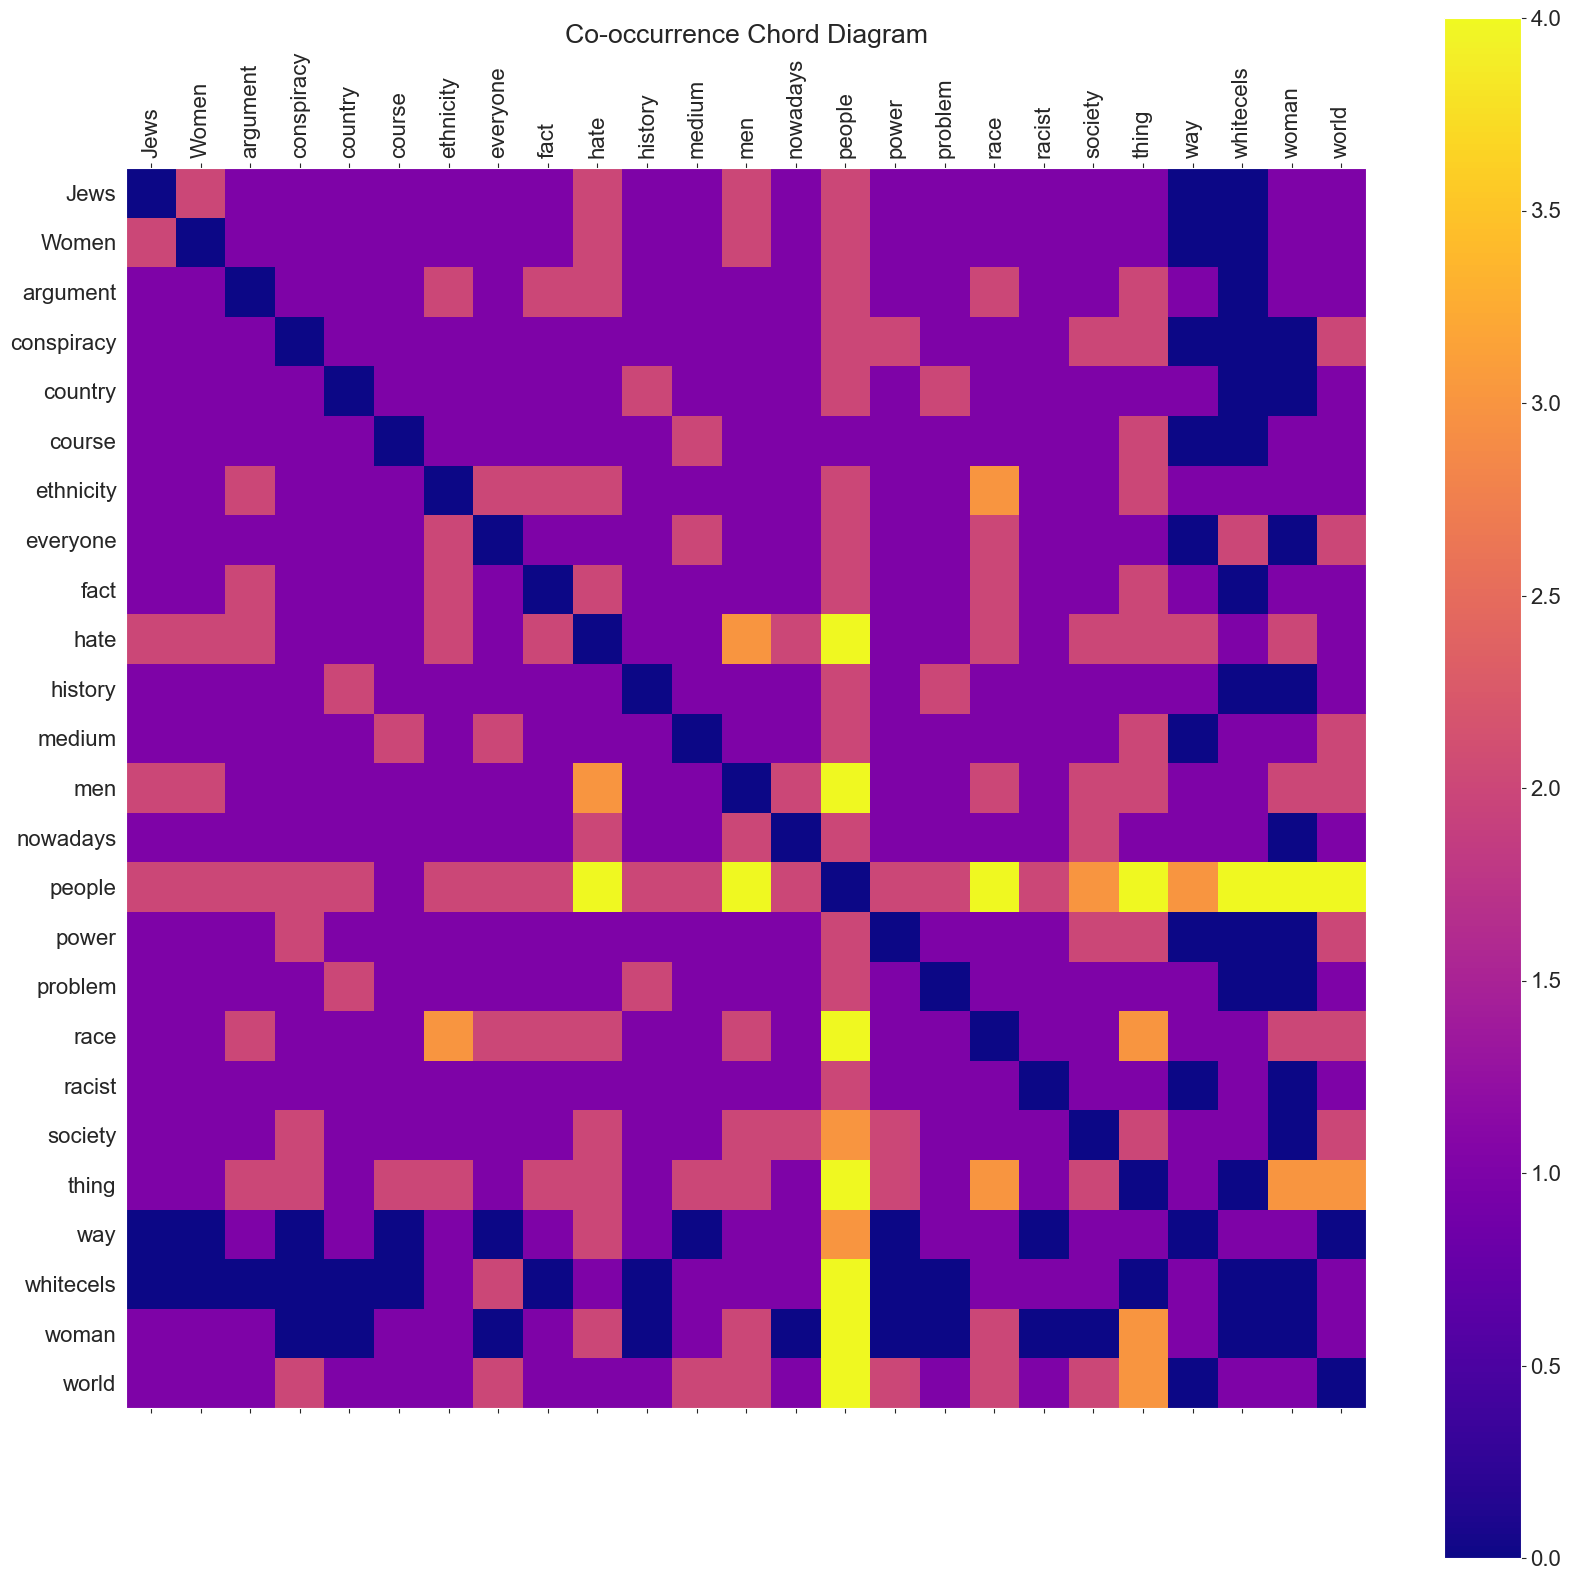

In [138]:
from matplotlib import cm

# Create the chord diagram
fig, ax = plt.subplots(figsize=(20, 20))
plt.rcParams.update({'font.size': 16})

chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("storm_25_topics.svg")
# Display the chord diagram
plt.show()

# Now Ethnicels

In [139]:
# Create co-occurrence matrix
import matplotlib.pyplot as plt
from matplotlib import cm

mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_ethnic['main_topics']), columns=mlb.classes_, index=df_ethnic.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 139

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array.shape

(25, 25)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_68099/2907182524.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma'))


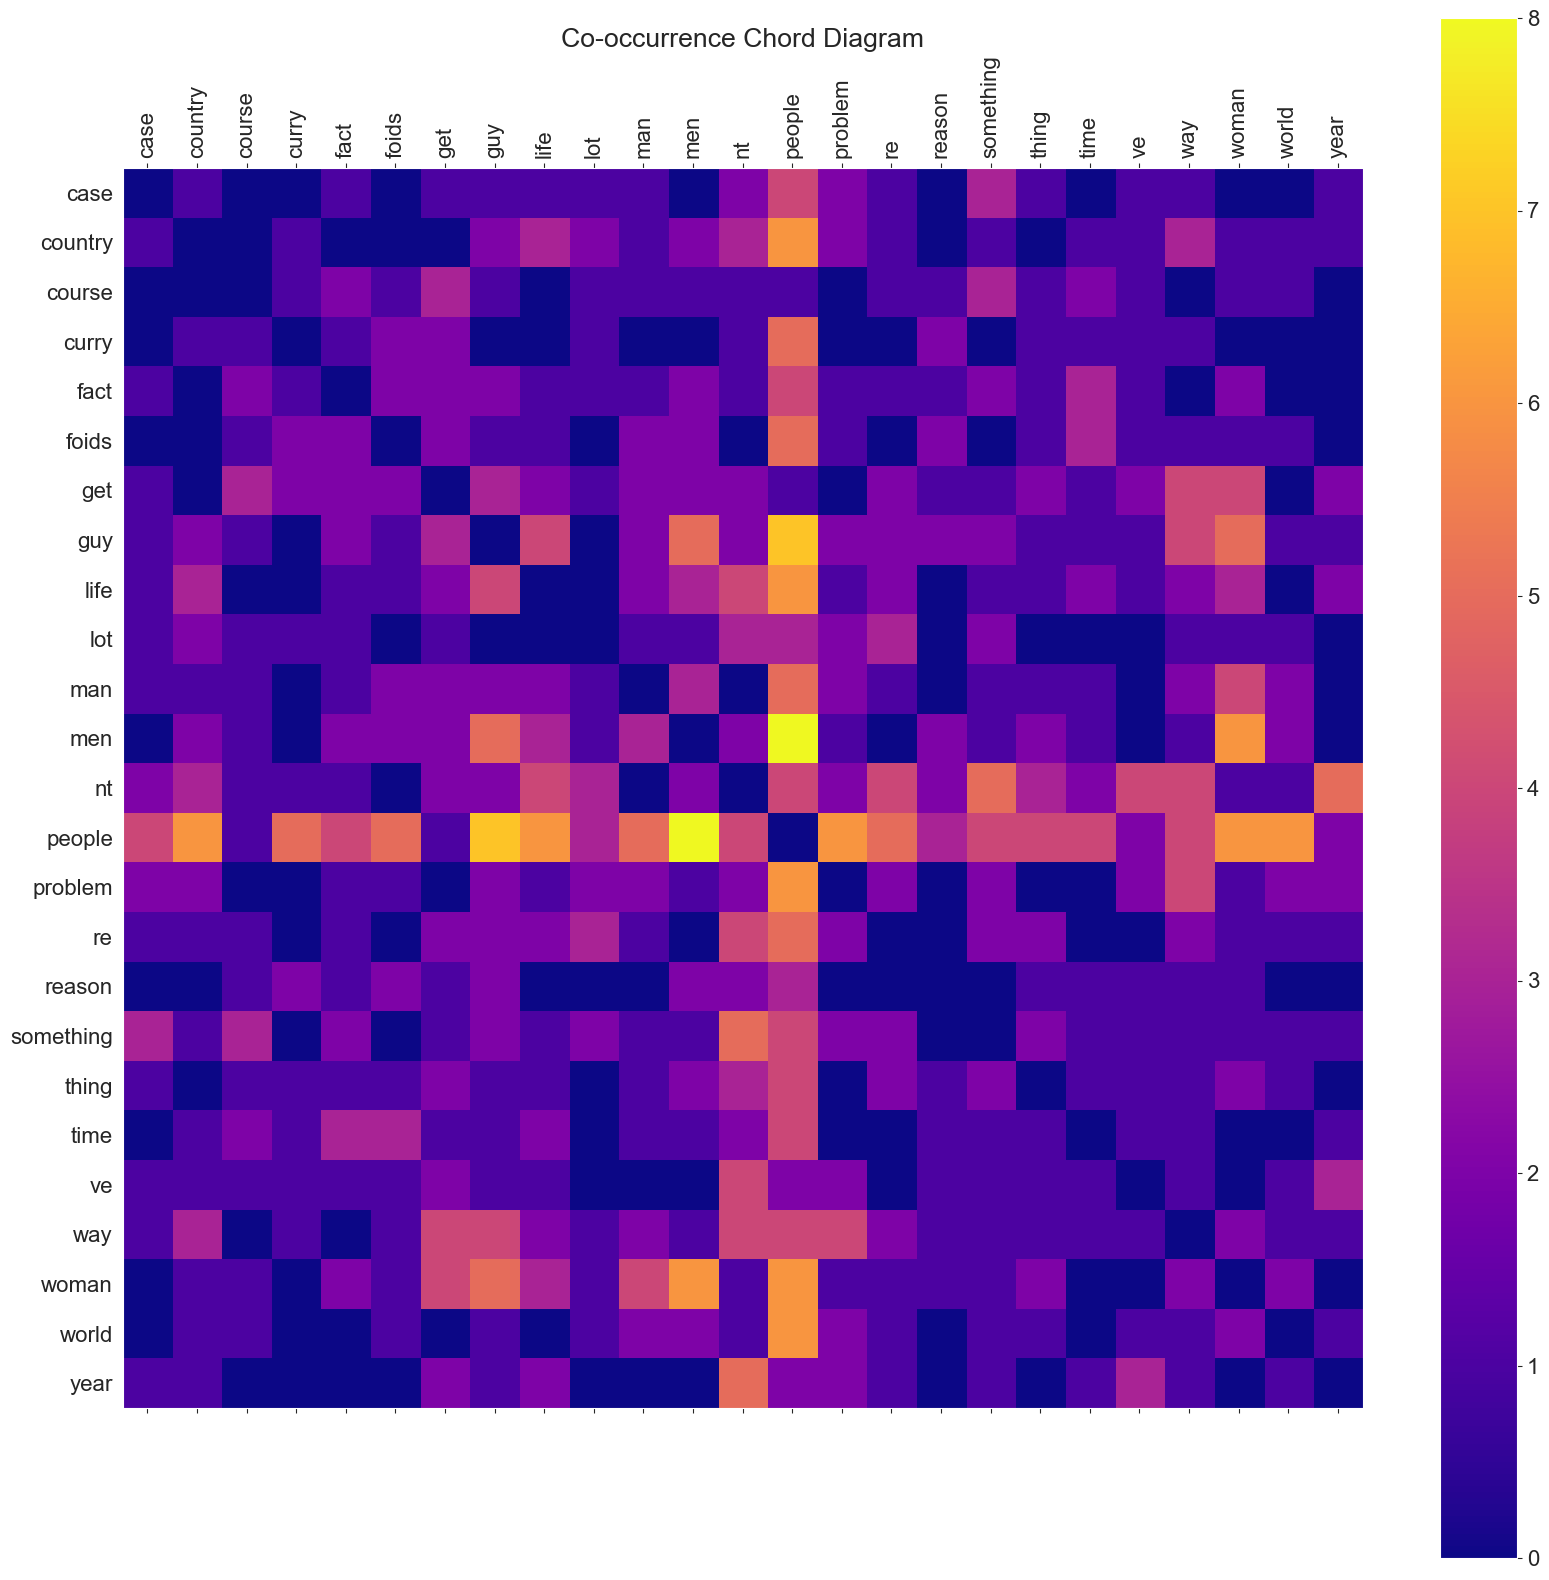

In [140]:
from matplotlib import cm

# Create the chord diagram
fig, ax = plt.subplots(figsize=(20, 20))
plt.rcParams.update({'font.size': 16})

chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("ethnic_25_topics.svg")
# Display the chord diagram
plt.show()

In [ ]:
import datetime
df = i.incel_posts

# alternate fix is to load the data with another pandas backend. This is more memory-hungry however and the initial load is slower as well.
df = load_incel_parquet(dtype_backend='numpy_nullable').incel_posts
df[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]

df

In [ ]:
def remove_rows_without_words(dataframe, word_list, column_name):
    return dataframe[dataframe[column_name].apply(lambda x: any(word in x for word in word_list))]

In [ ]:
#initialise lists
storm_list = ["stormfrontcel","nazicel","strormfrontcel","altrightcel","nationalistcel","stromfrontcel","antisemiticcel","rightcel","antisemeticcel","whitecel","jewcel","negroidcel","whitenationalistcel","kebabcel"]

# Call the function to remove rows without words from the list
df_storm = remove_rows_without_words(df, storm_list, 'post_content')
df_storm

In [ ]:
#initialise lists
ethnic_list =["ethniccel","blackcel","ricecel","currycel","ethnicel","muslimcel","arabcel","browncel","spanishcel","africancel","thaicel","persiancel","polecel","pakicel"]

# Call the function to remove rows without words from the list
df_ethnic = remove_rows_without_words(df, ethnic_list, 'post_content')
df_ethnic

In [ ]:
# Filter these groups using previously defined methods
df_storm['post_content_clean'] = df_storm['post_html']
df_ethnic['post_content_clean'] = df_ethnic['post_html']

# run the methods
# remove the HTML stuff from df_storm
df_storm['post_content_clean'] = df_storm['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

df_storm['post_content_clean']

# remove the HTML stuff from df_ethnic
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

df_ethnic['post_content_clean']


In [ ]:
# Remove stop words
df_storm.post_content_clean = df_storm.post_content_clean.apply(remove_stop_words);
df_ethnic.post_content_clean = df_ethnic.post_content_clean.apply(remove_stop_words);

In [ ]:
## Remove special symbols
df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

## Remove named entities from 'post_content' column
df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(remove_named_entities)

## Function to remove one-letter long words
df_storm['word_usage'] = df_storm.post_content_clean.apply(get_word_usage)

In [ ]:
## Remove special symbols
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

## Remove named entities from 'post_content' column
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(remove_named_entities)

## Function to remove one-letter long words
df_ethnic['word_usage'] = df_ethnic.post_content_clean.apply(get_word_usage)

In [ ]:
%%time
# Extract main topics
df_storm['main_topics'] = df_storm.post_content_clean.apply(extract_main_topics)

In [ ]:
%%time
# Extract main topics
df_ethnic['main_topics'] = df_ethnic.post_content_clean.apply(extract_main_topics)

In [ ]:
%%time
# Visualize the word use (takes few minutes time)

storm_word_usage = df_storm['word_usage'].sum()
storm_word_df = pd.DataFrame.from_dict(storm_word_usage, orient='index', columns=['Count'])
storm_word_df = storm_word_df.sort_values(by='Count', ascending=False)

#plot only top 30
plt.figure(figsize=(10, 6))
word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

In [ ]:
%%time
# Visualize the word use (takes few minutes time)

ethnic_word_usage = df_ethnic['word_usage'].sum()
ethnic_word_df = pd.DataFrame.from_dict(ethnic_word_usage, orient='index', columns=['Count'])
ethnic_word_df = ethnic_word_df.sort_values(by='Count', ascending=False)

#plot only top 30
plt.figure(figsize=(10, 6))
word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

In [ ]:
# select top 10 topics
storm_top_topics_list = storm_word_df.index.to_list()[:10]

# Function to check if a row contains any word from the top_topics_list
def contains_top_topic(row):
    for topic in storm_top_topics_list:
        if topic in row:
            return True
    return False

# Remove rows that don't contain words from the top_topics_list
df_storm = df_storm[df_storm['main_topics'].apply(contains_top_topic)]
df_storm

In [ ]:
# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_storm['main_topics']), columns=mlb.classes_, index=df_storm.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 600

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

In [ ]:
# Create the chord diagram
fig, ax = plt.subplots(figsize=(10, 10))
chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("storm_topics.svg")
# Display the chord diagram
plt.show()

In [ ]:
# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_ethnic['main_topics']), columns=mlb.classes_, index=df_ethnic.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 600

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

In [ ]:
###################################################################################################

In [ ]:
sorted_matrix = co_occurrence_matrix.sort_values(by=co_occurrence_matrix.columns.tolist(), axis=0, ascending=False)
#sorted_matrix = sorted_matrix[sorted_matrix.columns.tolist()]
sorted_matrix

In [ ]:
co_occurrence_sum = co_occurrence_matrix.sum(axis=1)

# Sort the co-occurrence matrix by the sum of co-occurrences
sorted_matrix = co_occurrence_matrix.loc[co_occurrence_sum.sort_values(ascending=False).index]

# Print the sorted co-occurrence matrix
print(sorted_matrix)

### Now visualize topics based on users


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

s = i.incel_users
# covert date to numeric
s.user_joined = pd.to_datetime(s.user_joined)


# Select users who joined during first year
start_date = '2018-01-01'
end_date = '2018-03-01'
mask_old = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)
#print(s.loc[mask])

#save ID's of old users:
old_users = s.user_id.loc[mask_old].to_list()

# Select users who joined last year
mask_new = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)

#save ID's of new users:
new_users = s.user_id.loc[mask_new].to_list()

In [ ]:
# Assuming you have the 'temp' dataframe with the required columns

# Function to assign color based on user ID
def get_color(poster_id):
    if poster_id in old_users:
        return 'red'
    elif poster_id in new_users:
        return 'blue'
    else:
        return 'black'  # Default color

# Convert 'time_posted' column to datetime
temp['time_posted'] = pd.to_datetime(temp['time_posted'])

# Plotting the topics over time
plt.figure(figsize=(10, 6))
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['main_topics'], c=get_color(row['poster_id']))

plt.xlabel('Time Posted')
plt.ylabel('Main Topics')
plt.title('Topics over Time')

# Show the legend for color coding
plt.legend(['CSV File 1', 'CSV File 2'])

# Display the plot
plt.show()


In [ ]:
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['top_topic'])

In [ ]:
plt.scatter(temp.time_posted, temp.top_topic.astype(str))

In [ ]:
print(temp.time_posted.size)
print(temp.top_topic.size)


In [ ]:

# Function to remove items from lists except the first one
def remove_items_except_first(lst):
    if isinstance(lst, list) and len(lst) > 1:
        return [lst[0]]
    else:
        return lst

# Apply the function to the column containing lists
temp['top_topic'] = temp['main_topics'].apply(remove_items_except_first)
temp

In [102]:
#initialise lists
storm_list = ["stormfrontcel","nazicel","strormfrontcel","altrightcel","nationalistcel","stromfrontcel","antisemiticcel","rightcel","antisemeticcel","whitecel","jewcel","negroidcel","whitenationalistcel","kebabcel"]

# Call the function to remove rows without words from the list
df_storm = remove_rows_without_words(df, storm_list, 'post_content')
df_storm

NameError: name 'remove_rows_without_words' is not defined

In [ ]:
# need to group "i.incel_posts" by months and sum up the "Main topics"(created by topic modeling)
# make a scatter plot. X is dates and Y is rank of topic.
# color topics based on the user_id. if old - red, if new - blue


In [ ]:
s = i.incel_posts

In [ ]:
s.time_posted = pd.to_datetime(s.time_posted)

In [ ]:
temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum().plot()

In [ ]:
from collections import Counter

temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum(map(Counter, temp['main_topics']), Counter())

In [ ]:
all_topics_counter = sum(map(Counter, temp['main_topics']), Counter())
all_topics_counter.most_common(10)



In [ ]:
all_topics_counter.most_common(60)